In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import time
from datetime import datetime 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from textblob import Word 
from scipy import spatial

from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess

import matplotlib.pyplot as plt

In [2]:
ttw = pd.read_csv('ttw2_finalSpell.csv')
ttw=ttw.fillna("")
ttw.dropna(inplace=True)
ttw2 = ttw.copy()
five_ttw=ttw2['tweet'][:1000].tolist()

### tfidf 1

In [3]:
# from sklearn.feature_extraction.text import TfidfVectorizer
first_time = datetime.now() 

vectorizer = TfidfVectorizer(stop_words = 'english')
vectors = vectorizer.fit_transform(five_ttw)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
first_time_final = datetime.now() - first_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_time_final))
df

Time elapsed in (hh:mm:ss.ms): "0:00:00.750571"


,aaa,aaahhhhh,abc,able,absolutely,abundant,acceptance,access,accountable,acid,...,yup,yyyy,zanne,ze,zero,zi,zimbabwe,zone,zones,zpamdelacruz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### cosin sim 1

In [4]:
#from sklearn.metrics.pairwise import linear_kernel
first_cos_time = datetime.now() 

cosine_similarities = linear_kernel(vectors)

first_cos_time_final = datetime.now() - first_cos_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))
pd.DataFrame(cosine_similarities, index = five_ttw, columns = five_ttw)

Time elapsed in (hh:mm:ss.ms): "0:00:00.008990"


,user father dysfunctional selfish drags kids dysfunction,user user thanks credit cant use cause dont offer wheelchair vans px,birthday majesty,model love u take u time ur,factsguide society,huge fan fare big talking leave chaos pay disputes get,user camping tomorrow user user user user user user user danny,next school year year exams cant think,love land,user user welcome im,...,nothappy career finishing one week,closeencounters,gymmorgon wing,glad arrived safely user,defines historically historicprivileged,really pretending,finally found way delete old tweets might find useful well,user,put yet havent see makes,user next chapter life star soon looking house today fianc
user father dysfunctional selfish drags kids dysfunction,1.000000,0.025557,0.0,0.0,0.0,0.0,0.102152,0.0,0.000000,0.059360,...,0.0,0.0,0.0,0.021026,0.0,0.0,0.0,0.123885,0.0,0.014813
user user thanks credit cant use cause dont offer wheelchair vans px,0.025557,1.000000,0.0,0.0,0.0,0.0,0.170104,0.0,0.000000,0.098847,...,0.0,0.0,0.0,0.035012,0.0,0.0,0.0,0.206293,0.0,0.024666
birthday majesty,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
model love u take u time ur,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.226563,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
factsguide society,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
really pretending,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000
finally found way delete old tweets might find useful well,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000
user,0.123885,0.206293,0.0,0.0,0.0,0.0,0.824573,0.0,0.000000,0.479158,...,0.0,0.0,0.0,0.169720,0.0,0.0,0.0,1.000000,0.0,0.119567
put yet havent see makes,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000


### cosin sim 2

In [5]:
#from sklearn.metrics.pairwise import cosine_similarity
second_cos_time = datetime.now() 

cosine = cosine_similarity(vectors, vectors)
second_cos_time_final = datetime.now() - second_cos_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(second_cos_time_final))
pd.DataFrame(cosine, index = five_ttw, columns = five_ttw)

Time elapsed in (hh:mm:ss.ms): "0:00:00.009993"


,user father dysfunctional selfish drags kids dysfunction,user user thanks credit cant use cause dont offer wheelchair vans px,birthday majesty,model love u take u time ur,factsguide society,huge fan fare big talking leave chaos pay disputes get,user camping tomorrow user user user user user user user danny,next school year year exams cant think,love land,user user welcome im,...,nothappy career finishing one week,closeencounters,gymmorgon wing,glad arrived safely user,defines historically historicprivileged,really pretending,finally found way delete old tweets might find useful well,user,put yet havent see makes,user next chapter life star soon looking house today fianc
user father dysfunctional selfish drags kids dysfunction,1.000000,0.025557,0.0,0.0,0.0,0.0,0.102152,0.0,0.000000,0.059360,...,0.0,0.0,0.0,0.021026,0.0,0.0,0.0,0.123885,0.0,0.014813
user user thanks credit cant use cause dont offer wheelchair vans px,0.025557,1.000000,0.0,0.0,0.0,0.0,0.170104,0.0,0.000000,0.098847,...,0.0,0.0,0.0,0.035012,0.0,0.0,0.0,0.206293,0.0,0.024666
birthday majesty,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
model love u take u time ur,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.226563,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
factsguide society,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
really pretending,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000
finally found way delete old tweets might find useful well,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000
user,0.123885,0.206293,0.0,0.0,0.0,0.0,0.824573,0.0,0.000000,0.479158,...,0.0,0.0,0.0,0.169720,0.0,0.0,0.0,1.000000,0.0,0.119567
put yet havent see makes,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000


### cosin sim 3

In [6]:
#from scipy import spatial
start_time = datetime.now() 

dataSetI = [3, 45, 7, 2]
dataSetII = [2, 54, 13, 15]
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)
print(result)
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

0.97228425171235
Time elapsed in (hh:mm:ss.ms): "0:00:00.001000"


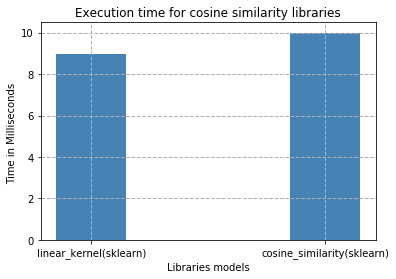

In [7]:
l = [first_cos_time_final.microseconds/1000,second_cos_time_final.microseconds/1000]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Libraries models')
plt.ylabel('Time in Milliseconds ')
plt.xticks([1,2],['linear_kernel(sklearn)','cosine_similarity(sklearn)'])
plt.title('Execution time for cosine similarity libraries')
plt.yticks()
plt.style.use('default')
plt.show()

### tfidf 2

In [8]:
second_time = datetime.now() 

documents = five_ttw

# Create the Dictionary and Corpus
mydict = corpora.Dictionary([simple_preprocess(line) for line in documents])
corpus = [mydict.doc2bow(simple_preprocess(line)) for line in documents]

# Create the TF-IDF model
tfidf = models.TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weights
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])

second_time_final = datetime.now() - second_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(second_time_final))

[['drags', 0.44], ['dysfunction', 0.44], ['dysfunctional', 0.44], ['father', 0.32], ['kids', 0.37], ['selfish', 0.4], ['user', 0.07]]
[['user', 0.12], ['cant', 0.22], ['cause', 0.37], ['credit', 0.37], ['dont', 0.2], ['offer', 0.31], ['px', 0.37], ['thanks', 0.27], ['use', 0.25], ['vans', 0.37], ['wheelchair', 0.37]]
[['birthday', 0.5], ['majesty', 0.86]]
[['love', 0.37], ['model', 0.52], ['take', 0.44], ['time', 0.42], ['ur', 0.47]]
[['factsguide', 0.71], ['society', 0.71]]
[['big', 0.29], ['chaos', 0.35], ['disputes', 0.39], ['fan', 0.27], ['fare', 0.39], ['get', 0.2], ['huge', 0.33], ['leave', 0.29], ['pay', 0.29], ['talking', 0.33]]
[['user', 0.64], ['camping', 0.46], ['danny', 0.51], ['tomorrow', 0.35]]
[['cant', 0.27], ['exams', 0.44], ['next', 0.3], ['school', 0.35], ['think', 0.28], ['year', 0.66]]
[['love', 0.45], ['land', 0.89]]
[['user', 0.32], ['im', 0.49], ['welcome', 0.81]]
[['climbed', 0.43], ['consumer', 0.43], ['index', 0.36], ['may', 0.29], ['mom', 0.32], ['previous',

[['user', 0.19], ['new', 0.32], ['album', 0.47], ['break', 0.59], ['released', 0.53]]
[['racism', 0.3], ['hate', 0.28], ['american', 0.32], ['congress', 0.38], ['curse', 0.38], ['deplorable', 0.38], ['haters', 0.38], ['standing', 0.38]]
[['make', 0.29], ['sunshine', 0.76], ['gray', 0.36], ['skies', 0.45]]
[['user', 0.07], ['happy', 0.2], ['something', 0.78], ['makes', 0.3], ['say', 0.29], ['wanted', 0.42]]
[['football', 0.38], ['thing', 0.36], ['thats', 0.38], ['actually', 0.39], ['mo', 0.44], ['watchable', 0.49]]
[['day', 0.39], ['happy', 0.39], ['hump', 0.83]]
[['love', 0.44], ['let', 0.67], ['say', 0.6]]
[['user', 0.12], ['dont', 0.41], ['via', 0.53], ['happy', 0.33], ['worry', 0.65]]
[['great', 0.3], ['never', 0.3], ['things', 0.38], ['came', 0.49], ['como', 0.44], ['zones', 0.49]]
[['happy', 0.43], ['puppy', 0.9]]
[['dont', 0.26], ['know', 0.27], ['one', 0.27], ['going', 0.31], ['youre', 0.34], ['room', 0.4], ['soul', 0.43], ['troubled', 0.48]]
[['amp', 0.31], ['dark', 0.67], ['re

### tfidf 3

In [9]:
#from tfidf import TfIdf
#start_time = datetime.now() 

#table = TfIdf()
#table.add_document("foo", ["alpha", "bravo", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])
#table.add_document("bar", ["alpha", "bravo", "charlie", "india", "juliet", "kilo"])
#table.add_document("baz", ["kilo", "lima", "mike", "november"])

#print(table.similarities(["alpha", "bravo", "charlie"])) # => [['foo', 0.6875], ['bar', 0.75], ['baz', 0.0]]
#print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

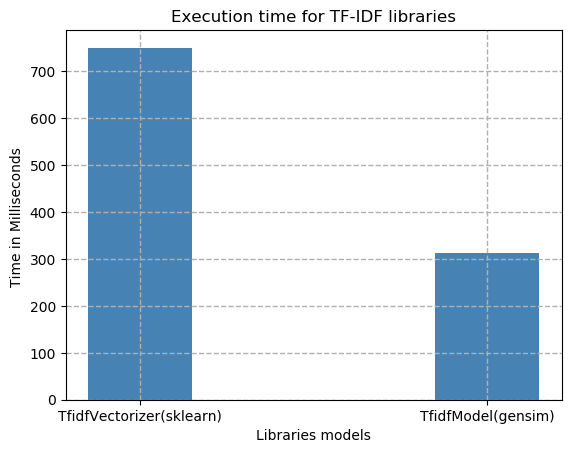

In [10]:
l = [first_time_final.microseconds/1000,second_time_final.microseconds/1000]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Libraries models')
plt.ylabel('Time in Milliseconds ')
plt.xticks([1,2],['TfidfVectorizer(sklearn)','TfidfModel(gensim)'])
plt.title('Execution time for TF-IDF libraries')
plt.yticks()
plt.style.use('default')
plt.show()

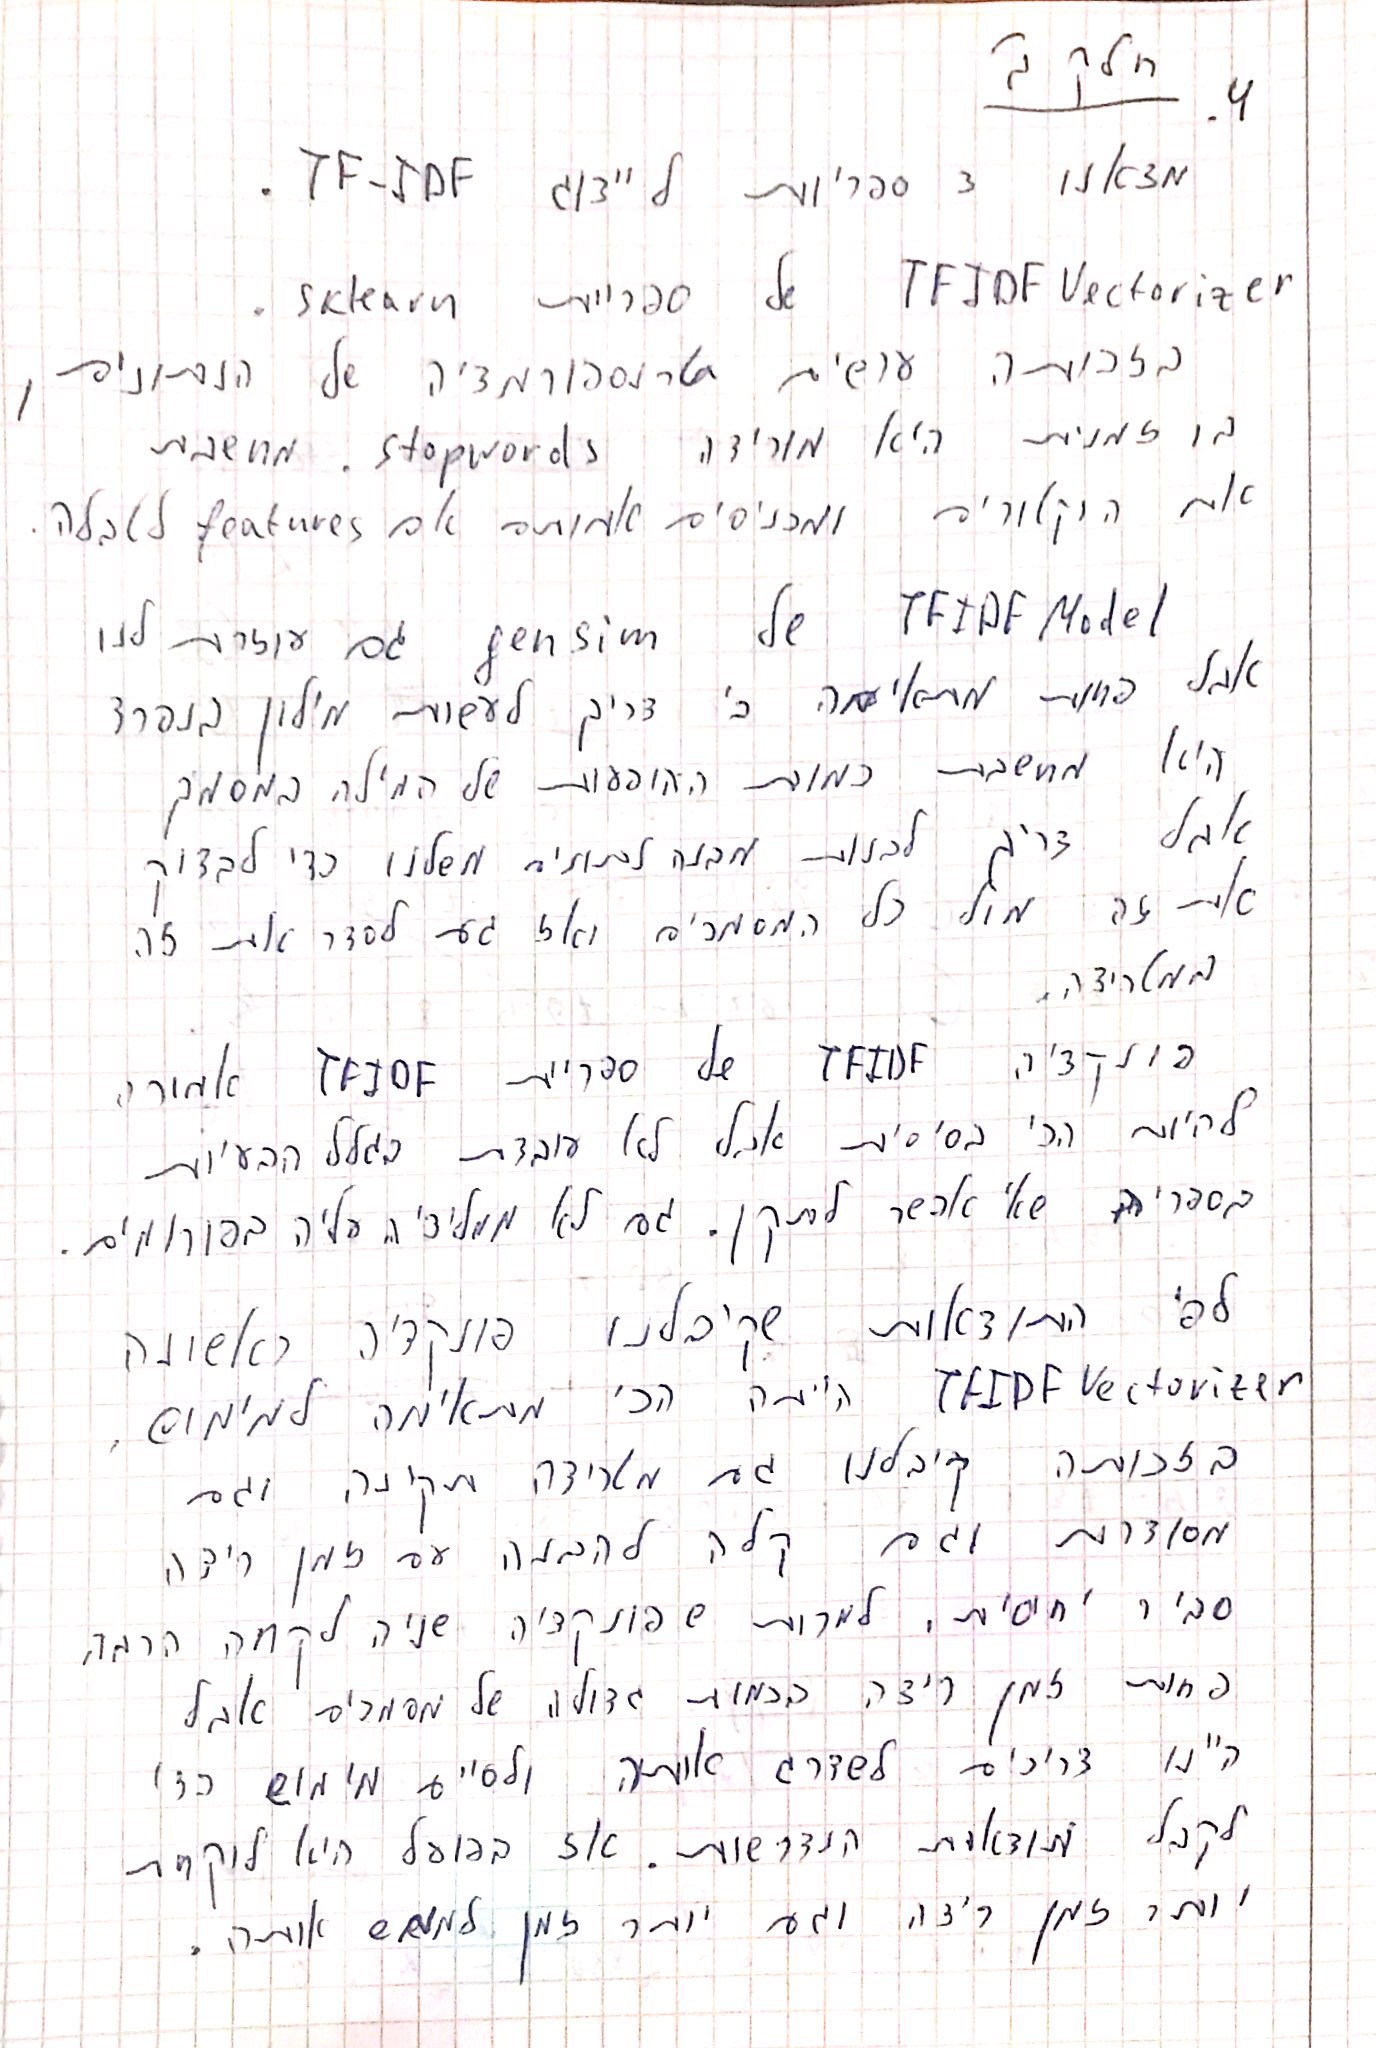

In [11]:
from IPython.display import Image
Image("Desktop\IR_Lab3.jpg")